# Homework 5

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Section 1: Harvard Case

*This section will not be graded, but it will be discussed in class.*

**Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

2. Is the factor portfolio...
* long-only
* long-short
* value-weighted
* equally-weighted

4. What steps are taken in the factor construction to try to reduce the correlation between the factors?
5. What is the point of figures 1-6?
6. How is a “smart beta” ETF different from a traditional ETF?
7. Is it possible for all investors to have exposure to the “value” factor?
8. How does factor investing differ from traditional diversification?


If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

1) There exists the size factor, value factor, profitability/quality factor, and momentum factor. The size factor is measured by market capitalization, largest 30% and lowest 30% in NYSE for instance. The value factor is the ratio of book factor to market capitalization, the profitability factor is the ratio of operating profit to book value. The investment factor also a quality factor measures an assets' percentage change in value of firm assets across a year. For momentum factor, bottom and top 20% of all stocks in previous year was used to construct the winner and loser portfolios

Factor Measurements from the case:


Size: Market capitalization (stock price × shares outstanding)
Value: Book-to-Market (B/M) ratio
Profitability: Operating profit/book value
(Operating profit = revenues - COGS - SG&A - interest)
Investment: Percentage change in total assets year-over-year
Momentum: Price appreciation over previous year


Factor Portfolio Characteristics from case:
Academic implementations:


Long-short portfolios (e.g., SMB, HML, RMW, CMA)
Value-weighted

Commercial (Smart Beta) implementations:

Long-only
Various weighting schemes based on factors


Steps to Reduce Factor Correlations:
The case doesn't explicitly discuss steps to reduce correlations between factors.
Point of Figures 1-6:


Figure 1: Shows no strong relationship between beta and returns, contradicting CAPM
Figure 2: Shows small firms earn higher returns than large firms
Figure 3: Shows high B/M firms earn higher returns than low B/M
Figure 4: Shows more profitable firms earn higher returns
Figure 5: Shows conservative investment firms earn higher returns
Figure 6: Shows high momentum stocks earn higher returns


Smart Beta vs Traditional ETF differences:
Traditional ETFs:


Portfolio weights based on market capitalization
Passive index tracking

Smart Beta ETFs:

Weights based on firm characteristics or return properties
Rules-based but not market-cap weighted
Combination of passive and active approaches


Value Factor Exposure for All:
No, as explained by Cliff Asness in the case: "For every value investor, who tilts toward or selects cheap value stocks, there must be an investor on the other side who is underweighting value and overweighting expensive, growth stocks."
Factor vs Traditional Diversification:
Traditional:


Diversify by asset class (equities, bonds, real estate, commodities)

Factor:

Diversify across return drivers (factors)
Can provide better diversification across market cycles
Different factors perform differently in various economic conditions
Factors have different correlations and cyclicality (e.g., quality/momentum perform in declining rates, value/size in rising rates)

***

# 2. The Factors

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

In [47]:
import os
import pandas as pd
import numpy as np
import sys
from sklearn.linear_model import LinearRegression
notebook_dir = "homework"
if notebook_dir in os.getcwd():
    os.chdir(os.pardir)
def load_data(filename, data_path="./data",sheet_name=None):
    try:
        csv_path = os.path.join(data_path, filename)
        data = pd.read_excel(csv_path,parse_dates=True,sheet_name=sheet_name)
        data.set_index("Date",inplace=True)
    except Exception as e:
        print(f"Unable to load data: {e}")
    return data
factor_data = load_data("factor_pricing_data.xlsx",sheet_name="factors (excess returns)")
portfolio_data = load_data("factor_pricing_data.xlsx",sheet_name="portfolios (excess returns)")
display(portfolio_data.tail())
display(factor_data.tail())

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-30,-0.0629,0.0018,-0.0234,-0.0244,0.0199,-0.0368,-0.0999,-0.0632,-0.0205,-0.0686,...,-0.0352,-0.0842,-0.0639,-0.0554,-0.0279,-0.0437,-0.0455,-0.1186,-0.0502,-0.0284
2024-05-31,0.0383,-0.0188,0.0159,-0.0224,0.0598,0.0017,0.0931,0.1255,-0.0024,0.0447,...,0.0350,-0.0008,-0.0029,0.0322,-0.0393,0.0251,0.0324,0.0427,0.0428,0.0348
2024-06-30,-0.0354,-0.0409,-0.0056,-0.0346,0.0062,-0.0406,0.0394,0.0075,-0.0053,-0.1286,...,-0.0877,0.0259,-0.0325,0.0468,0.0019,-0.0103,-0.0065,-0.0128,0.0005,-0.0170
2024-07-31,0.0466,0.0361,0.0312,0.0259,0.1124,0.0806,-0.0441,0.0270,-0.0152,-0.0281,...,0.1134,-0.0025,0.0599,-0.0058,-0.0311,0.0701,0.0799,0.1894,0.0628,0.0545
2024-08-31,0.0186,0.0461,0.0490,0.0040,0.0748,-0.0240,0.0550,0.0121,0.0582,0.0530,...,0.0076,0.0196,-0.0169,0.0027,0.0499,0.0172,0.0385,0.0008,0.0050,0.0579


,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
2024-04-30,-0.0467,-0.0256,-0.0052,0.0148,-0.0030,-0.0042
2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307,-0.0002
2024-06-30,0.0277,-0.0437,-0.0331,0.0051,-0.0178,0.0090
2024-07-31,0.0124,0.0828,0.0573,0.0022,0.0043,-0.0242
2024-08-31,0.0161,-0.0365,-0.0112,0.0085,0.0086,0.0478


***

1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics. • mean
• volatility
• Sharpe

In [48]:
# Univaraite statistics of factors

factor_stats = pd.DataFrame()
factor_stats = factor_stats.assign(mean = factor_data.mean(axis=0),
                                    std = factor_data.std(axis=0), 
                                    annualised_mean = factor_data.mean(axis=0)*12, 
                                    annualised_std = factor_data.std(axis=0)*np.sqrt(12),
                                    annualsied_sharpe = factor_data.mean(axis=0)*12/factor_data.std(axis=0)*np.sqrt(12))
display(factor_stats)

,mean,std,annualised_mean,annualised_std,annualsied_sharpe
MKT,0.007190,0.045294,0.086277,0.156904,6.598459
SMB,0.000693,0.029408,0.008319,0.101873,0.979977
HML,0.002151,0.031754,0.025809,0.109999,2.815554
RMW,0.003925,0.024022,0.047096,0.083213,6.791546
CMA,0.002461,0.021097,0.029537,0.073084,4.849771
UMD,0.005226,0.044619,0.062709,0.154564,4.868571


***

2. Based on the factor statistics above, answer the following.
(a) Does each factor have a positive risk premium (positive expected excess return)? (b) How have the factors performed since the time of the case, (2015-present)?


In [49]:
# for each asset in portfolio run a mulitvariate linear regression to find their regression betas, alphas, to each asset
from dask.distributed import Client
futures = []
with Client() as client:
    for i in range(len(portfolio_data.columns)):
        column_names = portfolio_data.columns
        X = factor_data.values
        y = portfolio_data.iloc[:,i].values.reshape(-1,1)
        future = client.submit(LinearRegression(fit_intercept=True).fit,X,y)
        futures.append(future)
    results = [future.result() for future in futures]

    
    

In [50]:
betas = np.array([result.coef_.flatten() for result in results])
betas_data = pd.DataFrame(betas, index = portfolio_data.columns, columns = [i+"_beta" for i in factor_data.columns])
# display(betas_data)
alphas = np.array([result.intercept_ for result in results])
alphas_data = pd.DataFrame(alphas, index = portfolio_data.columns, columns = ["alpha"])
# display(alphas_data)
model_results_data = pd.concat([alphas_data,betas_data],axis=1)
display(model_results_data)

,alpha,MKT_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,UMD_beta
Agric,-0.000332,0.816373,0.375082,0.076565,0.184495,0.165550,0.064764
Food,-0.000311,0.734807,-0.084645,-0.019122,0.483066,0.465294,0.016396
Soda,0.000464,0.828886,-0.001462,0.005216,0.522960,0.440986,-0.110719
Beer,0.000511,0.781371,-0.104045,-0.173079,0.570608,0.488619,0.060224
Smoke,0.001328,0.828606,-0.095579,-0.094505,0.668849,0.800921,-0.073902
Toys,-0.004688,1.082547,0.609206,-0.188188,0.529646,0.265225,-0.181792
Fun,0.002582,1.201180,0.274872,0.055582,0.023016,-0.220590,-0.214514
Books,-0.003195,1.091521,0.315547,0.182247,0.355699,0.104073,-0.090504
Hshld,-0.001726,0.811496,-0.064613,-0.231706,0.488408,0.523760,-0.013715
Clths,-0.002234,1.076783,0.410879,0.005064,0.753023,0.023952,-0.206768


In [51]:
# Cross sectional regression to view premiums for each factor
y = portfolio_data.mean(axis=0).values.reshape(-1,1)
X = betas_data.values
cross_sectional_regression = LinearRegression(fit_intercept=True).fit(X,y)
cross_sectional_regression_data = pd.DataFrame(cross_sectional_regression.coef_.flatten()*12,index = factor_data.columns,columns=["Annualised factor risk premium"])
display(cross_sectional_regression_data)
print(f"cross sectional regressionintercept: {cross_sectional_regression.intercept_[0]}")
print(f"R squared: {cross_sectional_regression.score(X,y)}")

,Annualised factor risk premium
MKT,0.049138
SMB,-0.046199
HML,-0.026437
RMW,0.024439
CMA,-0.022189
UMD,0.009615


cross sectional regressionintercept: 0.00427572955982328
R squared: 0.41401888304430345


In [52]:
factor_mean = factor_data.mean(axis=0).to_frame("Historical Annualised factor excess returns")
print(f"Historical Annualised factor excess returns:")
display(factor_mean)

Historical Annualised factor excess returns:


,Historical Annualised factor excess returns
MKT,0.007190
SMB,0.000693
HML,0.002151
RMW,0.003925
CMA,0.002461
UMD,0.005226


Evidently not all the factors have a positive expected risk premium.  The cross-sectional regression shows mixed outcomes, with some factors displaying negative risk premiums (SMB, HML, CMA) and others showing positive premiums (MKT, RMW, UMD). This suggests that, during the sample period, exposure to market, profitability, and momentum factors contributed positively to returns, whereas size, value, and conservative investment factors did not. The reward to risk taken in a factor is given by the cross sectional regression across all securities.

***

3. Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

,MKT,SMB,HML,RMW,CMA,UMD
MKT,1.000000,0.227756,-0.204356,-0.246768,-0.357823,-0.175585
SMB,0.227756,1.000000,-0.029072,-0.414055,-0.049575,-0.055304
HML,-0.204356,-0.029072,1.000000,0.219651,0.678450,-0.216986
RMW,-0.246768,-0.414055,0.219651,1.000000,0.127209,0.079525
CMA,-0.357823,-0.049575,0.678450,0.127209,1.000000,0.008398
UMD,-0.175585,-0.055304,-0.216986,0.079525,0.008398,1.000000


<Axes: >

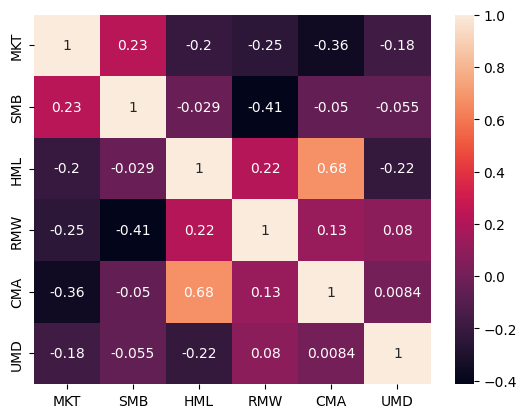

In [53]:
import seaborn as sns
factor_data_corr = factor_data.corr()
display(factor_data_corr)
sns.heatmap(factor_data_corr, annot=True)

It is clear from the analysis that correlations among various factors are generally low, highlighting their distinct roles in explaining asset returns. However, there is a notable exception; the correlation between the investment factor (CMA) and the value factor (HML) is relatively high, registering at 0.68. This significant correlation might suggest to some, such as Fama and French, that the investment factor could be somewhat redundant when the value factor is already considered in the model. Despite this, the univariate correlation does not fully capture the dynamic. It's important to consider that the HML factor may still offer significant benefits in explaining certain variations in asset prices, as evidenced by its positive risk premium in earlier results. This indicates that while CMA and HML share some common ground, each has unique contributions that could be critical in multifactor models, particularly when nuanced aspects of asset pricing are being examined. This suggests a more complex interaction where both factors, despite their correlation, are essential for a comprehensive understanding of the determinants of asset returns.

***

4. Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

In [54]:
# Calculate tangency weights
factor_cov = factor_data.cov()
factor_cov_inv = np.linalg.inv(factor_cov)
factor_tangency_weights = factor_cov_inv @ factor_data.mean(axis=0) / (np.ones(factor_data.shape[1]) @ factor_cov_inv @ factor_data.mean(axis=0))
factor_tangency_weights_dataframe = pd.DataFrame(factor_tangency_weights, index = factor_data.columns, columns = ["tangency_weights"])
display(factor_tangency_weights_dataframe)

,tangency_weights
MKT,0.209760
SMB,0.077337
HML,-0.042142
RMW,0.313263
CMA,0.338982
UMD,0.102798


It seems like the least useful is the HML/SMB factor as they have the smallest weight. The CMA factor and RMW factorn have the highest weights. Factors with the low mean returns are useful to portfolios if they can help diversify portfolios, means they reduce the covariance of a portfolio and can expand the tangency.

Looking at both sample sizes, the profitability factor looks to be the most important by measure of the tangency weights, having the largest weighting for the 2015 sample and the second largest for the 1980 to the present sample. The investment factor has the largest weighting in the 1980 sample, which could partially be a reason as to why Fama and French included it in their five factors.  The least important seem to be the size and the value factors from the perspective of the 1980- present sample, if looking at the 2015-present sample, the investment factor should also be included.

In [55]:
# remove RMW and CMA

factor_smaller_data = factor_data.drop(columns=["RMW","CMA"])
factor_smaller_cov = factor_smaller_data.cov()
factor_smaller_cov_inv = np.linalg.inv(factor_smaller_cov)
factor_smaller_tangency_weights = factor_smaller_cov_inv @ factor_smaller_data.mean(axis=0) / (np.ones(factor_smaller_data.shape[1]) @ factor_smaller_cov_inv @ factor_smaller_data.mean(axis=0))
factor_smaller_tangency_weights_dataframe = pd.DataFrame(factor_smaller_tangency_weights, index = factor_smaller_data.columns, columns = ["tangency_weights"])
display(factor_smaller_tangency_weights_dataframe)


,tangency_weights
MKT,0.365529
SMB,-0.032422
HML,0.356199
UMD,0.310694


Upon analyzing the tangency weights of a six-factor model, it is evident that the RMW (Robust Minus Weak) and CMA (Conservative Minus Aggressive) factors hold the highest weights at 0.313263 and 0.338982 respectively, underscoring their significant importance in the portfolio. Conversely, the HML (High Minus Low) and SMB (Small Minus Big) factors appear to have less influence given their smaller weights, with HML showing a negative weight of -0.042142, indicating shorting.

Despite their low mean returns, factors such as HML and SMB still contribute value to portfolio diversification. Their inclusion can reduce portfolio covariance and potentially expand the tangency, which is crucial for achieving an optimal risk-return balance. This diversification benefit underscores that factors with lower mean returns can still play a critical role in comprehensive investment strategies.

When recalculating tangency weights after excluding RMW and CMA, leaving only MKT (Market), SMB, HML, and UMD (Up Minus Down), a notable shift occurs. MKT and CMA weights increase substantially to 0.371490 and 0.762089 respectively, highlighting their heightened relative importance in the aIn analyzing the tangency weights of a portfolio consisting of six factors (MKT, SMB, HML, RMW, CMA, UMD), the factors RMW and CMA exhibit the highest weights, at 0.313263 and 0.338982 respectively, indicating their significant roles in optimizing the portfolio's Sharpe ratio. In contrast, HML and SMB have much lower weights, with HML even showing a negative weight (-0.042142), suggesting a lesser or potentially adverse impact on portfolio efficiency.

Despite their low mean returns, factors like HML and SMB can still be crucial for portfolio diversification. Their inclusion can help reduce overall portfolio covariance, thereby contributing to a more favorable risk-return profile. This diversification benefit is essential for expanding the portfolio's efficient frontier, enhancing its overall performance even if the individual factor returns are not substantial.

When the tangency portfolio is recalculated excluding RMW and CMA, leaving only MKT, SMB, HML, and UMD, the weight distribution shifts notably. MKT and HML receive increased weights of 0.365529 and 0.356199, respectively, suggesting that their contributions to portfolio variance reduction become more significant in the absence of RMW and CMA. Conversely, SMB now has a negative weight (-0.032422), further indicating its limited utility in the reduced model. UMD maintains a relatively high weight at 0.310694, underscoring its consistent contribution across different portfolio constructions.

***

What do you conclude about the importance or unimportance of these styles?

In conclusion, each style or factor exhibits its unique contributions to portfolio performance, contingent on the presence of other factors and the specific market conditions. The shift in factor weights in the reduced model (excluding RMW and CMA) highlights the adaptive nature of factor importance based on the portfolio context. MKT (market) and UMD (momentum) factors take on more significant roles, compensating for the absence of RMW and CMA, which suggests that the interplay and correlation between factors are key in defining their individual contributions to a portfolio.

***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

***

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?

In [56]:
factors_aqr = factor_data.loc[:,["MKT","HML","RMW","UMD"]]

def run_factor_analysis(factor_data, portfolio_data):
    """
    Perform factor analysis using linear regression on provided factor and portfolio data.
    
    Parameters:
    - factor_data: DataFrame containing factor values.
    - portfolio_data: DataFrame containing portfolio returns.
    
    Returns:
    - model_results_data: DataFrame containing alpha, betas, and R squared for each portfolio.
    """
    # Set up Dask client
    client = Client()
    
    # Prepare futures list for asynchronous computation
    futures = []
    for i in range(len(portfolio_data.columns)):
        X = factor_data.values
        y = portfolio_data.iloc[:, i].values.reshape(-1, 1)
        future = client.submit(LinearRegression(fit_intercept=True).fit, X, y)
        futures.append(future)
    
    # Collect results from futures
    results = [future.result() for future in futures]
    
    # Process the results to extract coefficients and intercepts
    betas = np.array([result.coef_.flatten() for result in results])
    alphas = np.array([result.intercept_ for result in results])
    
    # Create DataFrames for betas, alphas, and R squared
    betas_data = pd.DataFrame(betas, index=portfolio_data.columns, columns=[col + "_beta" for col in factor_data.columns])
    alphas_data = pd.DataFrame(alphas, index=portfolio_data.columns, columns=["alpha"])
    r2_data = pd.DataFrame([result.score(X, y) for result, y in zip(results, portfolio_data.T.values)], index=portfolio_data.columns, columns=["R squared"])
    
    # Concatenate all results into a single DataFrame
    model_results_data = pd.concat([alphas_data, betas_data, r2_data], axis=1)
    
    # Clean up Dask client
    client.close()
    
    return model_results_data

aqr_results_data = run_factor_analysis(factors_aqr, portfolio_data)
display(aqr_results_data)

,alpha,MKT_beta,HML_beta,RMW_beta,UMD_beta,R squared
Agric,0.000643,0.836774,0.184332,-0.011247,0.080408,0.339175
Food,0.000579,0.679100,0.183550,0.489345,0.042428,0.464221
Soda,0.001436,0.783908,0.204231,0.490429,-0.084807,0.308354
Beer,0.001422,0.721367,0.038420,0.584607,0.087322,0.420762
Smoke,0.002942,0.737693,0.258770,0.655168,-0.028303,0.273489
Toys,-0.003111,1.116055,-0.014806,0.211998,-0.156598,0.508340
Fun,0.002542,1.250891,-0.019845,-0.094655,-0.223158,0.616501
Books,-0.002452,1.112262,0.257013,0.193680,-0.079413,0.686774
Hshld,-0.000674,0.751834,-0.000869,0.480492,0.016071,0.558410
Clths,-0.001513,1.115133,0.052037,0.550465,-0.198888,0.618299


In [57]:
MAE_alpha = np.mean(np.abs(aqr_results_data["alpha"]*12))
print(f"Mean absolute error of alpha annualised with factor 12 : {MAE_alpha}")

Mean absolute error of alpha annualised with factor 12 : 0.02299261897974808


If the pricing model is accurately capturing all relevant factors, the alphas, which represent the unexplained returns after accounting for the model's factors, should be small or close to zero. While an MAE of 2% may seem low, it is substantial enough to indicate that the model may not be fully capturing all the factors influencing the returns of each security. This level of unexplained variance points towards the possibility of missing factors that could be influencing security returns. Therefore, the presence of a 2% MAE calls into question the model's completeness and suggests that further investigation might be needed to identify additional factors or adjust the model to enhance its accuracy and robustness in pricing securities.

***

2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?

In [58]:

factor_FF_3 = factor_data.loc[:,["MKT","SMB","HML"]]
factor_FF_5 = factor_data.loc[:,["MKT","SMB","HML","RMW","CMA"]]
CAPM = factor_data.loc[:,["MKT"]]

model_results_data_FF_3 = run_factor_analysis(factor_FF_3, portfolio_data)
model_results_data_FF_5 = run_factor_analysis(factor_FF_5, portfolio_data)
model_results_data_CAPM = run_factor_analysis(CAPM, portfolio_data)
mae_FF_3 = np.mean(np.abs(model_results_data_FF_3["alpha"]))
mae_FF_5 = np.mean(np.abs(model_results_data_FF_5["alpha"]))
mae_CAPM = np.mean(np.abs(model_results_data_CAPM["alpha"]))
display(model_results_data_FF_3)
print(f"Mean absolute error of alpha for FF 3 annualised: {mae_FF_3*12}")
print("\n")
display(model_results_data_FF_5)
print(f"Mean absolute error of alpha for FF 5 annualised: {mae_FF_5*12}")
print("\n")
display(model_results_data_CAPM)
print(f"Mean absolute error of alpha for CAPM annualised: {mae_CAPM*12}")

,alpha,MKT_beta,SMB_beta,HML_beta,R squared
Agric,0.001344,0.771878,0.319200,0.147624,0.357393
Food,0.002980,0.649074,-0.227834,0.237038,0.416709
Soda,0.002899,0.771621,-0.155267,0.303818,0.280459
Beer,0.004569,0.677613,-0.274847,0.088782,0.362360
Smoke,0.005512,0.714429,-0.289706,0.361684,0.236211
Toys,-0.003176,1.059876,0.451761,0.063954,0.528722
Fun,0.000528,1.271657,0.267901,0.045733,0.609808
Books,-0.002111,1.077301,0.208098,0.308820,0.688783
Hshld,0.001494,0.725779,-0.208024,0.060876,0.513703
Clths,-0.000513,1.071457,0.180564,0.196275,0.574434


Mean absolute error of alpha for FF 3 annualised: 0.02398380425187014




,alpha,MKT_beta,SMB_beta,HML_beta,RMW_beta,CMA_beta,R squared
Agric,0.000028,0.806249,0.377867,0.037383,0.198617,0.197079,0.363375
Food,-0.000220,0.732243,-0.083940,-0.029042,0.486641,0.473276,0.490799
Soda,-0.000153,0.846194,-0.006222,0.072199,0.498818,0.387084,0.313214
Beer,0.000846,0.771957,-0.101456,-0.209514,0.583739,0.517938,0.442389
Smoke,0.000916,0.840159,-0.098757,-0.049796,0.652735,0.764943,0.305338
Toys,-0.005700,1.110966,0.601390,-0.078207,0.490008,0.176722,0.549694
Fun,0.001388,1.234713,0.265649,0.185360,-0.023757,-0.325023,0.613717
Books,-0.003698,1.105669,0.311655,0.237000,0.335966,0.060012,0.702782
Hshld,-0.001803,0.813640,-0.065203,-0.223409,0.485418,0.517083,0.589291
Clths,-0.003385,1.109106,0.401989,0.130156,0.707939,-0.076711,0.628634


Mean absolute error of alpha for FF 5 annualised: 0.03136735845666147




,alpha,MKT_beta,R squared
Agric,0.001695,0.797930,0.330534
Food,0.003818,0.581423,0.366464
Soda,0.003923,0.705134,0.253740
Beer,0.004953,0.624250,0.333662
Smoke,0.006770,0.619772,0.189975
Toys,-0.003140,1.117518,0.495417
Fun,0.000574,1.304721,0.599294
Books,-0.001206,1.063830,0.652329
Hshld,0.001765,0.686296,0.493945
Clths,0.000044,1.070038,0.558941


Mean absolute error of alpha for CAPM annualised: 0.020401569232397485


The CAPM model fits the best based on the MAE, but it is only slightly better than the AQR model

***

3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

The CAPM model fits the best among all.

The inclusion of the CMA factor in the Fama-French (FF) 5-factor model, compared to models that omit this factor (such as the AQR 4-factor model and the simpler 3-factor model), shows a noticeable impact on the alpha values across various industries.

In the FF 5-factor model, which includes CMA, the mean absolute error (MAE) of the alpha values is higher (0.03136735845666147 annualized), suggesting that the inclusion of CMA might reduce the model's effectiveness in explaining the returns fully. This is evident when compared to the lower MAE values in the simpler CAPM model (0.020401569232397485 annualized) and even in the AQR 4-factor model without CMA, where the MAE is intermediate at 0.02299261897974808 annualized. These results suggest that the CMA factor may not be contributing effectively to capturing the pricing of assets in the tested models, potentially due to multicollinearity with other factors like HML.

FF should use the momentum factor which appears to improve model fit in other configurations tested, the momentum factor typically captures additional aspects of asset returns that are not covered by size, value, or investment factors alone, suggesting that its inclusion could potentially enhance the explanatory power of the model and reduce unexplained variance (alpha), leading to a more robust asset pricing model.

***

4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

In [59]:

print(f"Mean R squared for AQR model: {aqr_results_data['R squared'].mean()}")
print(f"Mean R squared for FF 3 model: {model_results_data_FF_3['R squared'].mean()}")
print(f"Mean R squared for FF 5 model: {model_results_data_FF_5['R squared'].mean()}")
print(f"Mean R squared for CAPM model: {model_results_data_CAPM['R squared'].mean()}")

Mean R squared for AQR model: 0.5749352393834307
Mean R squared for FF 3 model: 0.5714835322871964
Mean R squared for FF 5 model: 0.5959505690338504
Mean R squared for CAPM model: 0.5261067780788897


These models lead to a decent r squared of about 50-60%, meaning the models can explain about half of the variation in asset prices given in the portfolios. However, comparing to just the CAPM, these factor only add a small amount of explanatory power, less than 5%, might not be the best factors to add to the LFD of assets.

***

5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

In [60]:
# sample average of risk premia
sample_average_risk_premium = factor_data.mean(axis=0)*12
display(sample_average_risk_premium)

MKT    0.086277
SMB    0.008319
HML    0.025809
RMW    0.047096
CMA    0.029537
UMD    0.062709
dtype: float64

In [62]:
# Cross sectional regression to view premiums for each factor
model_datas = {"AQR":aqr_results_data,"FF3":model_results_data_FF_3,"FF5":model_results_data_FF_5,"CAPM":model_results_data_CAPM}
for key,val in model_datas.items():
    y = portfolio_data.mean(axis=0).values.reshape(-1,1)
    X = val.loc[:,[col for col in val.columns if "beta" in col]].values
    cross_sectional_regression = LinearRegression(fit_intercept=True).fit(X,y)
    cross_sectional_regression_data = pd.DataFrame(cross_sectional_regression.coef_.flatten()*12,index = val.loc[:,[col for col in val.columns if "beta" in col]].columns,columns=[f"{key} Annualised factor risk premium"])
    display(cross_sectional_regression_data)
    print(f"{key} cross sectional regression intercept: {cross_sectional_regression.intercept_[0]}")
    print(f"{key} R squared: {cross_sectional_regression.score(X,y)}")
    residuals = y - cross_sectional_regression.predict(X)
    print(f"{key} residuals annualised MAE: {12*np.mean(np.abs(residuals))}")
    print("\n")
    


,AQR Annualised factor risk premium
MKT_beta,0.023172
HML_beta,-0.032521
RMW_beta,0.022762
UMD_beta,0.010707


AQR cross sectional regression intercept: 0.005782647979650725
AQR R squared: 0.21186599207589873
AQR residuals annualised MAE: 0.013641199787858207




,FF3 Annualised factor risk premium
MKT_beta,0.039970
SMB_beta,-0.043253
HML_beta,-0.019647


FF3 cross sectional regression intercept: 0.005187083054986973
FF3 R squared: 0.37098941317560574
FF3 residuals annualised MAE: 0.011868190255762644




,FF5 Annualised factor risk premium
MKT_beta,0.046851
SMB_beta,-0.046396
HML_beta,-0.026741
RMW_beta,0.024258
CMA_beta,-0.021729


FF5 cross sectional regression intercept: 0.00442682422695592
FF5 R squared: 0.4126093242601492
FF5 residuals annualised MAE: 0.011534451976394295




,CAPM Annualised factor risk premium
MKT_beta,0.00617


CAPM cross sectional regression intercept: 0.00711535891911297
CAPM R squared: 0.005470974891610303
CAPM residuals annualised MAE: 0.01525156698072399




Yes the sample average of risk premia differs substantially from the cross sectional esimate of risk premia. The reason is because cross sectional regression's estimate of risk premia considers each security's sensitivity or beta in its estimation while the simplen historical average does not consider variations across various assets. One measures the reward for taking a unit beta with the factor while the other does not correct for unit beta.

***

The MAE of residuals equivalent to the MAE of alphas is smaller in the cross sectional regression as compared to the time series regression MAE. The MAE of the cross-sectional regression residuals are consistently lower than the MAE of the time-series alphas for each corresponding model, suggesting that the cross-sectional approach might be capturing the variance in stock returns due to factor exposure more efficiently or that it is better at generalizing across the market than individual time-series models for each stock. This can be indicative of the models' effectiveness in pricing securities correctly when viewed from a market-wide perspective, despite potential shortcomings in capturing specific stock performances.